Objective 1: Read Chinese characters, transform them to graphs of two fonts. 

Objective 2: Do data augmentation. 

Example of transforming a string to a graph:


In [2]:
from PIL import Image, ImageFont, ImageDraw
import os
import numpy as np
import glob
text = u"专"
 
# text = u"書"

size = width, height = 120, 120
fontSize = 90 


# red is for the background color 
im = Image.new("RGB", size, 'white')       # (255, 255, 255)
dr = ImageDraw.Draw(im)

font = ImageFont.truetype(os.path.join("fonts", "li.ttf"), fontSize)
for width in [0, 1, 2]:
    dr.text((15, 0), text, font=font, fill="#000000", stroke_width=width)
    im.show()

im.rotate(angle=10, fillcolor='white').show()

image_array = np.asarray(im)
print(image_array)
# print(image_array[range(image_array.shape[0]), range(image_array.shape[1]), 0])
print(image_array[:,:,0])

[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]
[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]


In [10]:
# Crop the image: 
dr.show()

AttributeError: 'ImageDraw' object has no attribute 'show'

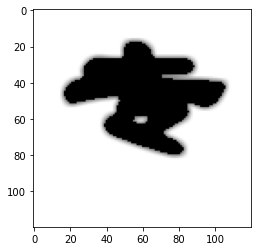

In [6]:
import cv2
from matplotlib import pyplot as plt

img = cv2.imread('output.png')

blur = cv2.blur(img, (5,5))

ret,thresh1 = cv2.threshold(blur,127,255,cv2.THRESH_TOZERO)


plt.imshow(thresh1)



# Production space:


Now let's read characters from characters.txt

https://www.qqxiuzi.cn/zh/hanzi/daquan-3.htm

https://medium.com/@tifa2up/image-classification-using-deep-neural-networks-a-beginner-friendly-approach-using-tensorflow-94b0a090ccd4

In [3]:
characters_list = [] 
with open('characters.txt', 'r', encoding='utf-8') as file:
    i = 0 
    for line in file:
        characters_list = line.split(' ')

Data augmentation:
You cannot rotate it upside down. Because for this specific font, for stroke 'heng' (basically a horizontal bar), the modification of the stroke at the left end (where it starts) is different from the modification of the stroke at the right end (where it ends).  

In [4]:
from tqdm import tqdm 

size = width, height = 100, 100
fontsize = 80
backgroundColor = 'white'

def findFiles(path): 
    return glob.glob(path)

fonts_list = findFiles('C:\\Users\\pasaa\\OneDrive\\Grad\\CSC 449\\Project\\data\\fonts\\*.ttf')

for font in fonts_list:
    font_name = os.path.splitext(os.path.basename(font))[0]
    # set the font
    font = ImageFont.truetype(os.path.join("fonts", font), fontsize)
    if not os.path.exists('./trainset_new/%s' %font_name):
        os.mkdir('./trainset_new/%s' %font_name)
    for index, char in tqdm(enumerate(characters_list)): 
        text = char 
        im = Image.new("RGB", size, backgroundColor) 
        dr = ImageDraw.Draw(im)        
        # Write this character to the drawboard! 
        dr.text((0, 0), text, font=font, fill="#000000")
        # Save this plain version to the disk 
        im.save('trainset_new/%s/' %font_name+str(index)+'.png')
    
    break    


20905it [00:30, 677.17it/s]


In [21]:
characters_list = [] 
with open('characters_eng.txt', 'r', encoding='utf-8') as file:
    i = 0 
    for line in file:
        characters_list = line.split(' ')

In [22]:
from tqdm import tqdm

size = width, height = 100, 100
fontsize = 80
backgroundColor = 'white'
def findFiles(path): 
    return glob.glob(path)

fonts_eng_list = findFiles('C:\\Users\\pasaa\\OneDrive\\Grad\\CSC 449\\Project\\data\\fonts_eng\\*.ttf')


In [24]:
for font in fonts_eng_list:
    font_name = os.path.splitext(os.path.basename(font))[0]
    # set the font
    font = ImageFont.truetype(os.path.join("fonts", font), fontsize)
    if not os.path.exists('./trainset_e/%s' %font_name):
        os.mkdir('./trainset_e/%s' %font_name)
    for index, char in tqdm(enumerate(characters_list)): 
        text = char 
        im = Image.new("RGB", size, backgroundColor) 
        dr = ImageDraw.Draw(im)        
        # Write this character to the drawboard! 
        dr.text((0, 0), text, font=font, fill="#000000")
        # Save this plain version to the disk 
        im.save('trainset_e/%s/' %font_name+str(index)+'.png')
        
        


52it [00:00, 802.13it/s]
52it [00:00, 1002.70it/s]
52it [00:00, 1002.67it/s]
52it [00:00, 983.74it/s]
52it [00:00, 1002.69it/s]
52it [00:00, 1064.02it/s]
52it [00:00, 1064.05it/s]
52it [00:00, 1042.78it/s]
52it [00:00, 1002.70it/s]
52it [00:00, 1064.05it/s]
52it [00:00, 965.51it/s]
52it [00:00, 868.98it/s]
52it [00:00, 628.18it/s]
52it [00:00, 931.08it/s]
52it [00:00, 947.99it/s]
52it [00:00, 840.96it/s]
52it [00:00, 766.76it/s]
52it [00:00, 695.20it/s]
52it [00:00, 931.54it/s]
52it [00:00, 1042.80it/s]
52it [00:00, 965.54it/s]
52it [00:00, 868.98it/s]
52it [00:00, 714.24it/s]
52it [00:00, 914.73it/s]
52it [00:00, 947.97it/s]
52it [00:00, 983.75it/s]
52it [00:00, 868.98it/s]
52it [00:00, 868.97it/s]
52it [00:00, 1022.35it/s]
52it [00:00, 983.30it/s]
52it [00:00, 915.15it/s]
52it [00:00, 965.52it/s]


In [5]:
def findFiles(path): 
    return glob.glob(path)
fonts_list = findFiles('C:\\Users\\pasaa\\OneDrive\\Grad\\CSC 449\\Project\\data\\fonts\\*.ttf')

True